# Einführung in der Machine Learning mit Python

Dies ist der erste Blogbeitrag einer ganzen Serie von Blogbeiträgen über Machine Learning. Diese gehen davon aus, dass der Leser über kein Hintergrundwissen in Statistik verfügt, aber Grundkenntnisse in Python besitzt und z.B. Python-Bibliotheken installieren kann.

## Was ist Machine Learning?

Machine Learning ist ein Gebiet der künstlichen Intelligenz, das das Ziel hat, Computerprogramme zu entwickeln, die selbständig von Daten lernen können und aufgrund dieser Daten präzise Vorhersagen oder Klassifizierungen liefern können. Typische Anwendungen von Machine Learning Algorithmen sind:

- Den Preis von Aktien in 6 Monaten basierend auf Unternehmensleistungen und Wirtschaftsdaten vorhersagen.
- Die Ziffern von Postleitzahlen in einem Bild zu identifizieren.
- Risikofaktoren für Krebs aufgrund klinischer und demografischer Daten abschätzen.

Man unterscheidet zwischen mehreren Arten von Machine Learning: Supervised (überwacht) und Unsupervised (unüberwacht) Learning. Das überwachte Lernen verwendet die Eingabewerte `X` und die vorklassifizierten Daten `Y`. Das Ziel ist, eine Funktion `f()` zu finden, mit der `f(x) = y` ist. Dann kann man diese Funktion auf nicht vorklassifizierte Daten anwenden, um Klassifikationen zu erhalten.

Beim unüberwachten Lernen haben wir nur die Eingabedaten `X`. Das Ziel ist es, Strukturen oder Muster innerhalb der Daten zu finden, mit deren Hilfe man mehr Information über die Daten erfahren kann. Diese Art von Lernen wird 'unüberwacht' genannt, weil es keine vordefinierte 'richtige' Antwort gibt.

Zwei weitere wichtige Begriffe sind *Klassifizierung* und *Regression*. Klassifizierung bedeutet, dass unsere Ausgabedaten `Y` keine metrische Darstellung haben. Beispielsweise kann man mit dem Gewicht und der Größe eines Huhns die Hühnerart bestimmen. Ein Beispiel für Regression wäre, den Kaufpreis eines Hauses aufgrund der Lage, Größe und Anzahl der Zimmer zu bestimmen.

## Datensatz holen

Der Datensatz stammt aus dem [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris), wo sich viele verschiedene kostenlose Datensätze finden.

Der gewählte Datensatz ist sehr bekannt in der Machine-Learning-Literatur. Er bezieht sich auf die drei Arten der Iris Blume. Gegeben sind Sepalumlänge, Sepalumbreite, Petalumlänge, Petalumbreite und die Klassifizierung von 150 Individuen. Wir wollen jetzt einen Algorithmus trainieren, um Individuen aufgrund der Längen und Breiten zu klassifizieren. Hierfür verwenden wir den kNN-Algorithmus.

![image](figures/blumen.png)

*Bild von [Petr Dlouhý](https://commons.wikimedia.org/wiki/User:Petr_Dlouh%25C3%25BD), lizensiert unter [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en). (Quelle: [Wikipedia - Kelchblatt](https://de.wikipedia.org/wiki/Kelchblatt))*

## Der kNN Algorithmus

KNN steht für *k nearest neighbours (k nächste Nachbarn)*. Das ist ein robuster und überwachter Algorithmus, der sowohl für Klassifizierung als auch für Regression verwendet werden kann. Zusätzlich wird kein Modell erstellt, sondern alle Trainingsdaten werden bei jeder Klassifizierung geladen.

Das bedeutet, dass kNN keine Zeit zum Trainieren braucht, dafür entstehen durch den großen Datensatz hohe Hauptspeicherkosten bei der Klassifizierungsphase. Außerdem ist die Berechnung teuer, weil für jede Klassifizierung der ganze Datensatz iteriert werden muss.

## Wie funktioniert kNN?

KNN plottet alle Trainingsdaten in einen N-dimensionalen Vektorraum, wobei n die Dimension des Eingabevektors ist. In unserem Fall ist `n=4`, weil unsere Eingabewerte Sepalumlänge und -breite und Petalumlänge und -breite sind.

Für jedes Element, das wir klassifizieren wollen, berechnen wir den Abstand zwischen dem Element und jedem Mitglied der Trainingsdaten. Häufig verwendet man den euklidischen Abstand, es funktioniert aber auch mit anderen Abstandsmetriken.

Nachdem wir alle Abstände haben, nehmen wir K Elemente mit dem geringsten Abstand. Abhängig davon, ob wir ein Klassifikationsproblem oder ein Regressionsproblem haben, nehmen wir entweder die am meisten vorkommende Klasse als Ergebnis oder den Durchschnitt des Y Parameters der Trainingsdaten.

Wie wählt man ein K ? Das ist eine gute Frage. Wichtig für Machine Learning Algorithmen ist es, gute Hyperparameter zu wählen, um die besten Ergebnisse zu erzielen. In der Regel möchte man den Abstand zwischen den Nachbarn minimieren, um die bestmögliche Genauigkeit zu erhalten. Man kann Hamming-Abstand für Klassifizierungsprobleme und Manhattan, Minkowski oder euclidischen Abstand für Regressionsprobleme verwenden. Das Problem, mit welchem wir uns beschäftigen, ist aber ziemlich einfach, und wir können einfach `k=5` setzen.

## Code

Wir werden ein paar Bibliotheken für die Berechnung und Machine Learning verwenden: `numpy`, `matplotlib` und `scikit-learn`. Wir importieren alle Bilbliotheken und dann auch die Daten:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
# Datensatz laden
iris = load_iris()

Jetzt wollen wir das Ergebnis anschauen und die Daten plotten. Wir verwenden dafür `matplotlib`. Zunächst wird in einem Fenster das erste Bild angezeigt. Schließt man das erste Fenster, erscheint das zweite Bild. Nachdem man das zweite Fenster geschlossen hat, läuft das Programm weiter.

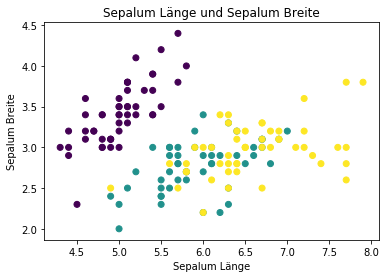

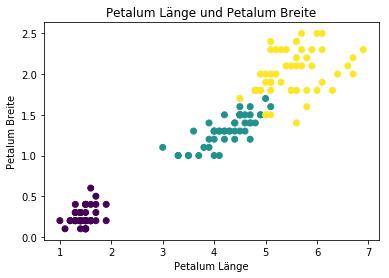

In [2]:
# Daten plotten
colors = list(iris['target'])
 
plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c=colors)
plt.title("Sepalum Länge und Sepalum Breite")
plt.xlabel("Sepalum Länge")
plt.ylabel("Sepalum Breite")
plt.show()
  
plt.scatter(iris['data'][:, 2], iris['data'][:, 3], c=colors)
plt.title("Petalum Länge und Petalum Breite")
plt.xlabel("Petalum Länge")
plt.ylabel("Petalum Breite")
plt.show()

Auch ohne einen Algorithmus kann man ein Klassifikationskriterium finden. Es gibt ein lineares Verhältnis zwischen Petalumlänge, Petalumbreite und Klasse der Blume. Jetzt wollen wir den Datensatz in Trainings- und Testdaten zerlegen. In der Regel nimmt man für Testdaten zwischen 10 und 30 Prozent aller Daten. Wir nehmen 20 Prozent.

Wir benutzen dafür die Funktion `sklearn.model_selection.train_test_split()` um 20 Prozent der Daten als Trainingsdaten zu nehmen. Die Funktion sorgt dafür, dass jedes Mal zufällige Stichproben ausgewählt wird. Zusätzlich wollen wir lieber mit numpy Arrays arbeiten und wandeln deswegen das pandas DataFrame zu einem numpy Array um.

In [5]:
# Trainings- und Testdaten erzeugen
x_train, x_test, y_train, y_test = train_test_split(
                    np.array(iris['data']),
                    np.array(iris['target']),
                    test_size=0.2)

Die kNN Implementierung mit `sklearn`:

In [6]:
## kNN Algorithmus
knn = KNeighborsClassifier(n_neighbors=5)
 
knn.fit(x_train, y_train)
 
pred = knn.predict(x_test)

So einfach ist es. Zuerst erzeugen wir ein Klassifikator-Objekt mit `k=5`. Dann werden die Daten geplottet und danach erstellen wir einen Vektor mit allen Vorhersagen. Um die Genauigkeit zu überprüfen, benötigen wir eine einfache Funktion.

In [7]:
### Funktion, die die Genauigkeit der Vorhersage berechnet
def calculate_accuracy(pred, target):
    counter = 0

    for i in range(len(pred)):
        if pred[i] == target[i]:
            counter += 1

    return counter / len(pred)

print(calculate_accuracy(pred, y_test))

0.9333333333333333


## Einen eigenen kNN Klassifikator entwickeln
Mithilfe des Pakets ist es einfach, ein kNN einzusetzen. Um zu wissen, wie genau kNN funktioniert, werden wir unsere eigene Implementierung entwickeln.

Das ist die Funktion, welche eine genaue Vorhersage für ein Element gibt:

In [8]:
def predict_one(k_neighbors, x_train, y_train, to_predict):
    distances = []
    neighbors = []

    # alle Abstände holen als (index, Vektor) speichern
    for i in range(len(x_train)):
        dst = np.linalg.norm(x_train[i] - to_predict)
        distances.append((i, dst))

    # liste nach Abstand sortieren
    distances.sort(key=lambda tup: tup[1])

    # k Nachbarn holen
    for i in range(k_neighbors):
        neighbors.append(y_train[distances[i][0]])

    # Ausgabe ist am meisten vorkommender Element
    return max(set(neighbors), key=neighbors.count)

Und das ist die kNN Implementierung. Die Funktion `predict_one()` wird nun für jedes Element aus den test Daten aufgerufen.

In [10]:
def kNN(k_neighbors, x_train, y_train, x_test):
    predictions = []

    for vec in x_test:
        predictions.append(predict_one(k_neighbors, x_train, y_train, vec))
    
    return predictions

Zum Abschluss wird getestet, welches Ergebnis wir bekommen.

Wir sollen für beiden Algorithmen eine Genauigkeit zwischen 0,95 und 1.00 bekommen. Das bedeutet, dass die Daten sich sehr leicht durch KNN klassifizieren lassen. Außerdem ist kNN ein starker Algorithmus für Machine Learning, welcher auch sehr einfach zu implementieren ist.

Zum Vergleich die Vorhersage und die Vorgabe der Daten

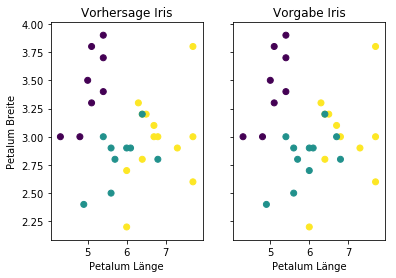

In [11]:
#Vergleich von Vorhersage und Vorgabe
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
ax1.scatter(x_test[:, 0], x_test[:, 1], c=pred)
ax1.set(title='Vorhersage Iris', ylabel='Petalum Breite', xlabel='Petalum Länge')
 
ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax2.set(title='Vorgabe Iris', xlabel='Petalum Länge')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

## Resourcen
- Gitlab-Repository mit dem kompletten Code - [Link](https://gitlab.com/emomicrowave/machine-learning-tutorials/tree/master/01-knn)
- Ein anderes Tutorial für kNN (Englisch) - [Link](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)
- Wikipedia - Kelchblatt - [Link](https://de.wikipedia.org/wiki/Kelchblatt)